In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
device = torch.device('cuda') if (torch.cuda.is_available()) else torch.device('cpu')
device

device(type='cpu')

In [15]:
import pickle
# with open('temp2.pick', 'wb') as f:
#     pickle.dump(model, f)
    
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

with open('../models/expanded_sp_model.pick', 'rb') as f:
    model = CPU_Unpickler(f).load()

In [16]:
complete = pd.read_csv('../data/Full_SPacific2.csv')
# complete = pd.read_csv('/kaggle/input/spacific3/Full_SPacific2.csv')
complete

,Unnamed: 0,folderidx,float,profileidx,year,month,day,lat,lon,nlat,...,prev3_ts5,prev3_ts6,prev3_ts7,prev3_ts8,prev3_dy,prev3_dx,ssh1,ssh2,bath1,bath2
0,10,0.0,1901058.0,337.0,2017.0,3.0,4.0,-49.5448,159.7474,-49.0256,...,-0.646798,0.461585,0.246950,-0.078740,-0.2956,-0.1431,0.053500,1.000000,0.277969,-1.000000
1,11,0.0,1901058.0,360.0,2017.0,10.0,20.0,-47.9904,163.5339,-47.4761,...,-0.364070,0.543888,0.226426,0.262563,-0.2163,-0.7417,-0.151312,1.000000,0.225017,-1.000000
2,12,0.0,1901058.0,361.0,2017.0,10.0,30.0,-47.4761,164.1107,-47.3438,...,-0.374211,0.566200,0.047431,0.412140,0.0083,-0.3137,-0.179385,-1.000000,-0.652355,-1.000000
3,13,0.0,1901058.0,362.0,2017.0,11.0,9.0,-47.3438,163.2821,-47.0608,...,-0.453763,0.278568,0.342156,0.049035,-0.1735,-0.2985,-0.835740,-1.000000,0.262931,-1.000000
4,14,0.0,1901058.0,363.0,2017.0,11.0,19.0,-47.0608,163.9069,-46.2846,...,-0.515990,0.227485,0.321838,0.073723,0.5143,0.5768,-0.477094,-1.000000,-0.314455,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61134,138220,10.0,3902389.0,134.0,2022.0,8.0,30.0,-20.1230,-109.7890,-20.0910,...,1.104784,0.609725,-0.550078,-0.118207,0.0450,0.0800,-0.551358,1.000000,-1.000000,0.129248
61135,138221,10.0,3902389.0,135.0,2022.0,9.0,9.0,-20.0910,-109.6610,-20.0180,...,1.169894,0.763656,-0.693145,0.005258,0.0200,0.0900,-0.028281,1.000000,-1.000000,0.230699
61136,138222,10.0,3902389.0,136.0,2022.0,9.0,19.0,-20.0180,-109.5840,-19.8910,...,1.127813,0.338755,-0.503737,-0.133409,-0.0070,0.1280,-0.086688,1.000000,-1.000000,0.266634
61137,138223,10.0,3902389.0,154.0,2023.0,3.0,17.0,-20.2200,-108.6730,-20.0560,...,1.310212,0.852507,-0.832035,0.113673,-0.3030,-0.0640,1.000000,-0.146425,-1.000000,0.132655


In [17]:
data = complete
# find correlation between prev_dx and dx
prev_dx = data.get('prev_dx')
dx = data.get('dx')
prev_dy = data.get('prev_dy')
dy = data.get('dy')
dx.corr(prev_dx), dy.corr(prev_dy)

(0.5184268981674282, 0.3533978379519491)

In [18]:
data = complete
data = data.assign(total_disp=np.sqrt(dx**2 + dy**2))
data = data[data.get('total_disp') < 1]
# find correlation between prev_dx and dx
prev_dx = data.get('prev_dx')
dx = data.get('dx')
prev_dy = data.get('prev_dy')
dy = data.get('dy')
dx.corr(prev_dx), dy.corr(prev_dy)

(0.5143756652284844, 0.5170038751989349)

In [19]:
chosen_params = ['ts1', 'ts2', 'ts3', 'ts4', 'ts5', 'ts6', 'ts7', 'ts8',
  'prev_ts1', 'prev_ts2', 'prev_ts3', 'prev_ts4', 'prev_ts5', 'prev_ts6',
  'prev_ts7', 'prev_ts8','prev2_ts1', 'prev2_ts2', 'prev2_ts3', 'prev2_ts4', 'prev2_ts5', 'prev2_ts6',
  'prev2_ts7', 'prev2_ts8','prev3_ts1', 'prev3_ts2', 'prev3_ts3', 'prev3_ts4', 'prev3_ts5', 'prev3_ts6',
  'prev3_ts7', 'prev3_ts8', 'bath1', 'bath2', 'ssh1', 'ssh2', 'prev_dy', 'prev_dx', 'prev2_dy', 'prev2_dx',
                 'prev3_dy', 'prev3_dx', 'dy', 'dx']

In [20]:
# picking a contiguous sequence
just_one = data[data.get('float') == 2902573.0].head(14)

small_test = torch.tensor(just_one[chosen_params[:-2]].to_numpy()).float().to(device)
pred = model(small_test).detach().cpu().numpy()
# pred = model.predict(small_test)
just_one = just_one.assign(pnlat = pred[:, 0] + just_one.get('lat'))
just_one = just_one.assign(pnlon = pred[:, 1] + just_one.get('lon')).reset_index()
just_one.to_csv('just_one.csv')
just_one

,index,Unnamed: 0,folderidx,float,profileidx,year,month,day,lat,lon,...,prev3_ts8,prev3_dy,prev3_dx,ssh1,ssh2,bath1,bath2,total_disp,pnlat,pnlon
0,112,334,2.0,2902573.0,125.0,2017.0,3.0,3.0,-27.995,-120.065,...,0.657106,-0.229,-0.273,0.630030,-1.000000,1.000000,0.031732,0.179725,-28.102551,-120.265682
1,113,335,2.0,2902573.0,126.0,2017.0,3.0,13.0,-28.145,-120.164,...,0.637936,-0.136,-0.286,1.000000,-0.779453,1.000000,0.200338,0.132620,-28.279759,-120.238015
2,114,336,2.0,2902573.0,127.0,2017.0,3.0,23.0,-28.267,-120.216,...,0.514106,-0.128,-0.221,0.905253,-1.000000,1.000000,0.119882,0.129124,-28.377935,-120.296440
3,115,337,2.0,2902573.0,128.0,2017.0,4.0,3.0,-28.250,-120.344,...,0.496550,-0.150,-0.099,1.000000,0.031837,1.000000,0.073253,0.122332,-28.235281,-120.469241
4,116,338,2.0,2902573.0,129.0,2017.0,4.0,13.0,-28.163,-120.430,...,0.681706,-0.122,-0.052,-0.189491,-1.000000,1.000000,0.232778,0.281448,-28.050943,-120.547998
5,117,339,2.0,2902573.0,130.0,2017.0,4.0,22.0,-27.990,-120.652,...,0.508919,0.017,-0.128,-0.053026,-1.000000,-0.068842,1.000000,0.366399,-27.838866,-120.894957
6,118,340,2.0,2902573.0,131.0,2017.0,5.0,2.0,-27.808,-120.970,...,0.710894,0.087,-0.086,-0.471371,-1.000000,0.450265,1.000000,0.477546,-27.664610,-121.267504
7,119,341,2.0,2902573.0,132.0,2017.0,5.0,12.0,-27.651,-121.421,...,0.550055,0.173,-0.222,-0.104666,-1.000000,-0.340642,1.000000,0.324728,-27.528842,-121.803351
8,120,342,2.0,2902573.0,133.0,2017.0,5.0,22.0,-27.609,-121.743,...,0.579257,0.182,-0.318,-0.082962,-1.000000,1.000000,0.299927,0.290338,-27.578282,-122.011439
9,121,343,2.0,2902573.0,134.0,2017.0,6.0,2.0,-27.623,-122.033,...,0.705496,0.157,-0.451,0.088565,-1.000000,0.717516,1.000000,0.371469,-27.618592,-122.283513


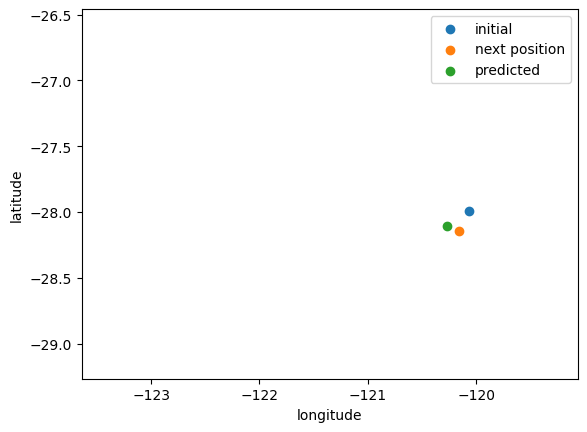

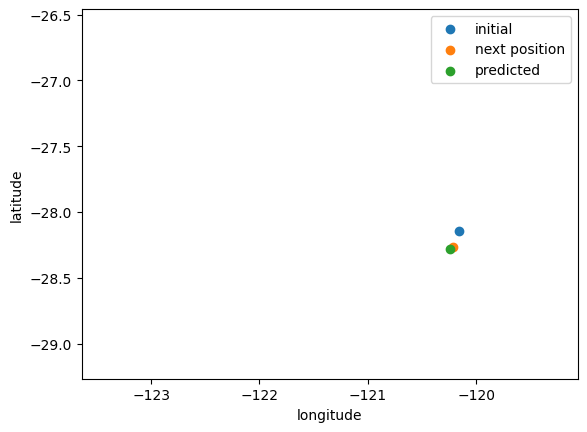

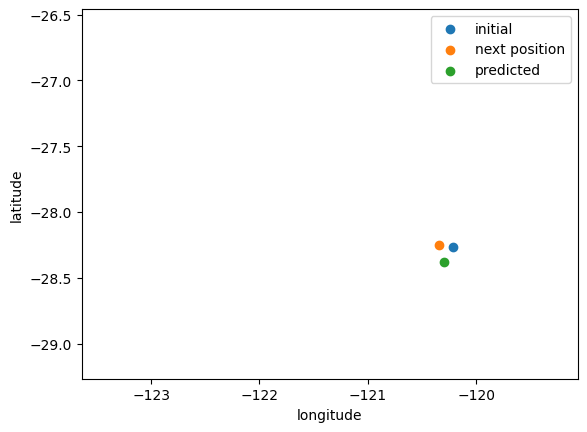

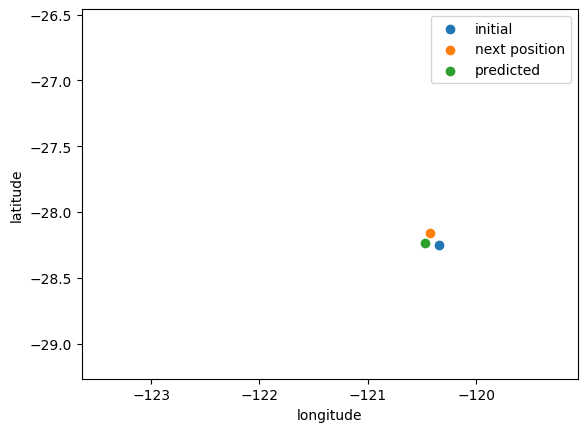

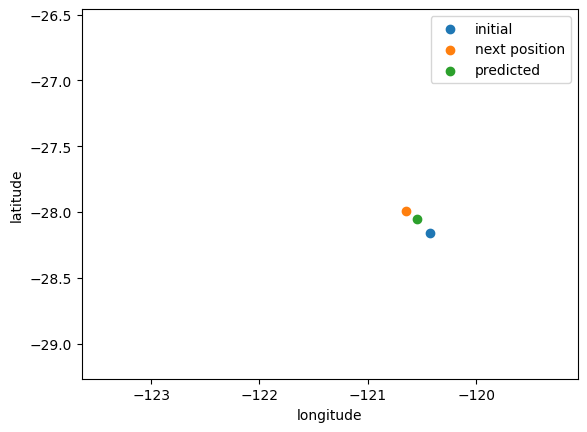

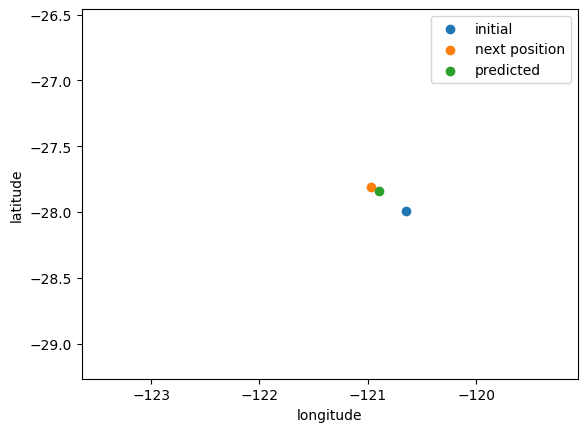

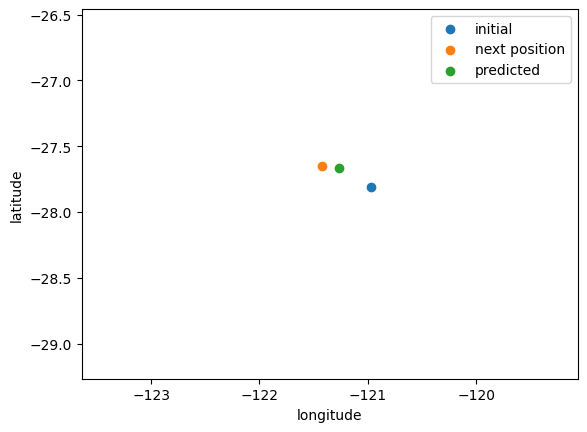

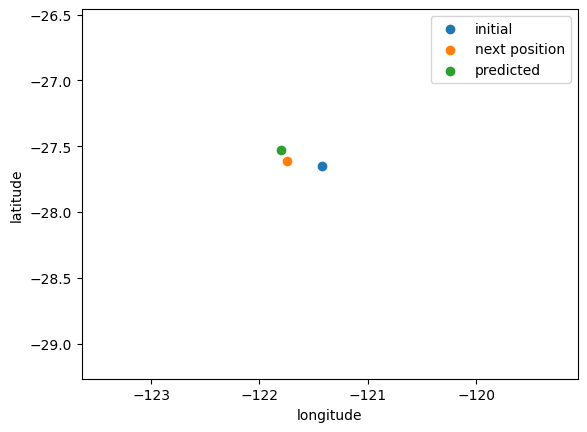

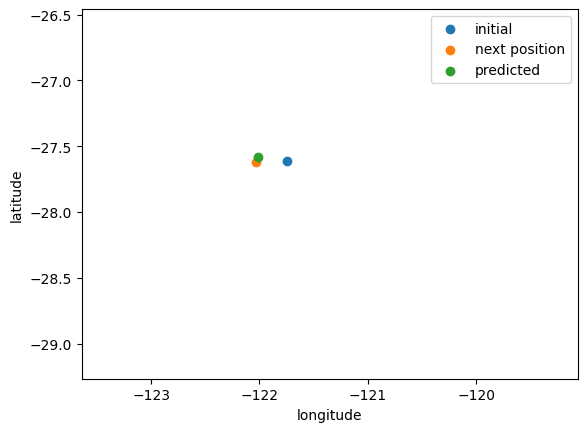

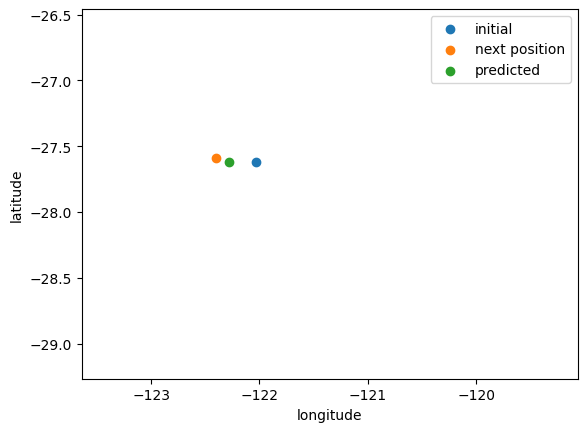

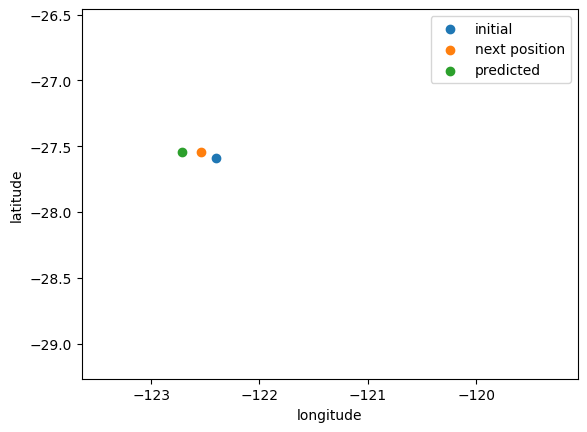

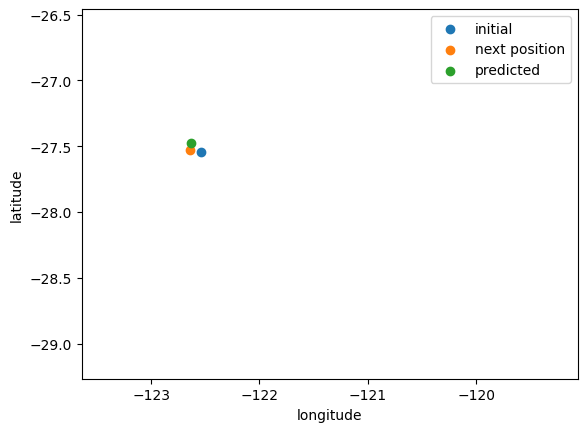

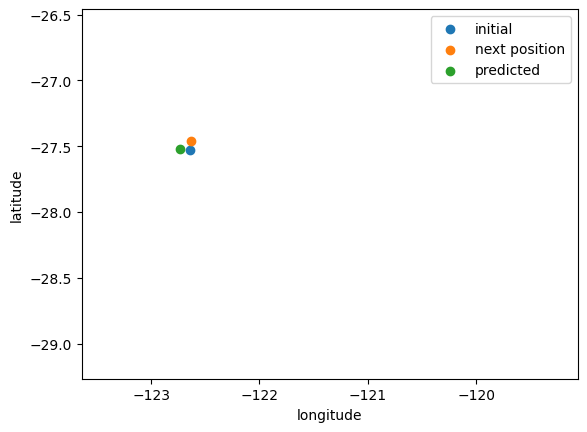

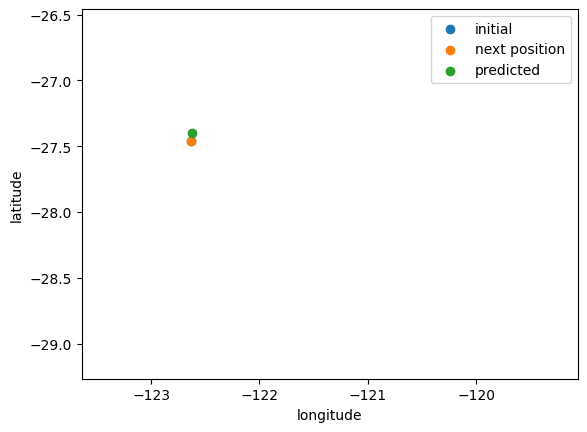

In [21]:
for i in range(just_one.shape[0]):
  y_plot = [just_one.get('lat')[i], just_one.get('nlat')[i], just_one.get('pnlat')[i]]
  x_plot = [just_one.get('lon')[i], just_one.get('nlon')[i], just_one.get('pnlon')[i]]
  for j in range(3):
    plt.scatter(x_plot[j], y_plot[j])
  plt.legend(['initial', 'next position', 'predicted'])
  plt.xlim((just_one.get('lon').min()-1, just_one.get('lon').max()+1))
  plt.ylim((just_one.get('lat').min()-1, just_one.get('lat').max()+1))
  plt.xlabel('longitude')
  plt.ylabel('latitude')
  plt.show()